In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder

In [28]:
okcupid_profiles = pd.read_csv('../data/okcupid_processed.csv')

## Encoding the data

In [29]:
# for the sign label, drop all the value 'unknown'
okcupid_profiles = okcupid_profiles[okcupid_profiles['sign'] != 'unknown']

In [30]:
okcupid_profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48889 entries, 0 to 59942
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     48889 non-null  int64  
 1   sex                     48889 non-null  object 
 2   body_type               48889 non-null  object 
 3   height                  48889 non-null  float64
 4   job                     48889 non-null  object 
 5   lives_in_san_francisco  48889 non-null  bool   
 6   religious               48889 non-null  bool   
 7   sign                    48889 non-null  object 
 8   age_grouped             48889 non-null  float64
dtypes: bool(2), float64(2), int64(1), object(4)
memory usage: 3.1+ MB


In [31]:
enc = OrdinalEncoder()
enc.fit(okcupid_profiles)

OrdinalEncoder()

In [32]:
encoded_data = enc.transform(okcupid_profiles)

Now we have a Numpy array with the encoded data, so no more objects, but only numbers.

In [33]:
encoded_data.dtype

dtype('float64')

# Random Forest

## Education prediction model

In [34]:
y = encoded_data[:,0] # This picks the sign column

X = encoded_data[:, [1, 2, 3, 4, 5, 6, 7]] # Pick all the other labels

# test_size = 0.3   means 70% training set | 30% test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [35]:
# n_estimators is the number of trees in the forest
rfc = RandomForestClassifier(n_estimators = 128)
rfc.fit(X_train, y_train)
rfc_prediction = rfc.predict(X_test)

In [36]:
print("Random Forest Classification report")
print(classification_report(y_test, rfc_prediction))
print("Random Forest Confusion Matrix")
print(confusion_matrix(y_test, rfc_prediction))

Random Forest Classification report
              precision    recall  f1-score   support

         0.0       0.06      0.03      0.04        91
         1.0       0.07      0.06      0.06       167
         2.0       0.06      0.06      0.06       238
         3.0       0.07      0.06      0.06       346
         4.0       0.07      0.06      0.07       478
         5.0       0.04      0.05      0.05       588
         6.0       0.06      0.07      0.06       774
         7.0       0.07      0.08      0.07       810
         8.0       0.07      0.08      0.08       905
         9.0       0.08      0.09      0.09       890
        10.0       0.06      0.07      0.06       848
        11.0       0.06      0.07      0.06       804
        12.0       0.06      0.06      0.06       756
        13.0       0.04      0.04      0.04       685
        14.0       0.06      0.05      0.05       658
        15.0       0.05      0.04      0.05       545
        16.0       0.04      0.05      0.05  

Let's now plot a proper confusion matrix

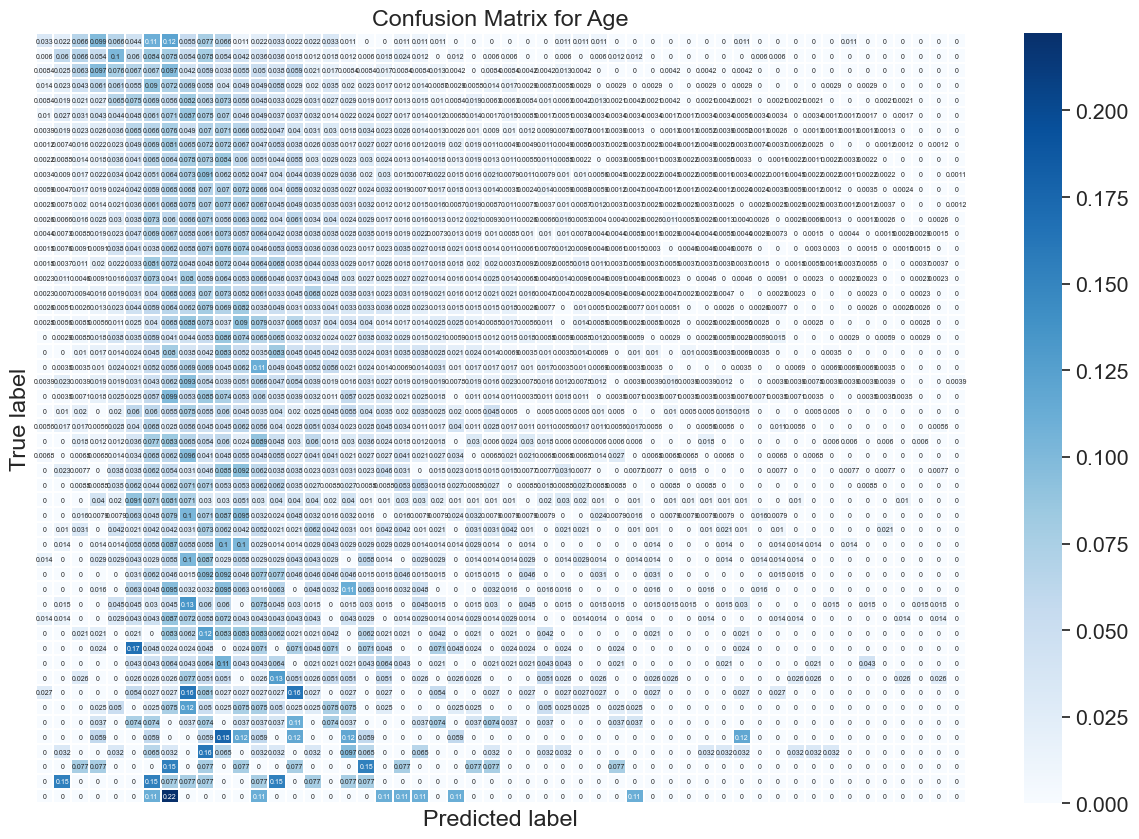

In [37]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, rfc_prediction)

matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis] # makes number into %
#matrix = matrix.astype('float')

# Build the plot
plt.figure(figsize = (15, 10))
sns.set(font_scale = 1.4)
sns.heatmap(matrix, 
            annot = True, 
            annot_kws = {'size':5},
            cmap = plt.cm.Blues, 
            linewidths = 0.2)

# Add labels to the plot
# class_names = np.array(okcupid_profiles["income"].unique())
# class_names = [-1, 80000, 20000, 40000, 30000, 50000, 60000, 1000000, 150000, 100000, 500000, 70000, 250000]
class_names = []

tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5

plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks2, class_names, rotation=0)

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.title('Confusion Matrix for Age')
plt.show()

<Figure size 1500x700 with 0 Axes>

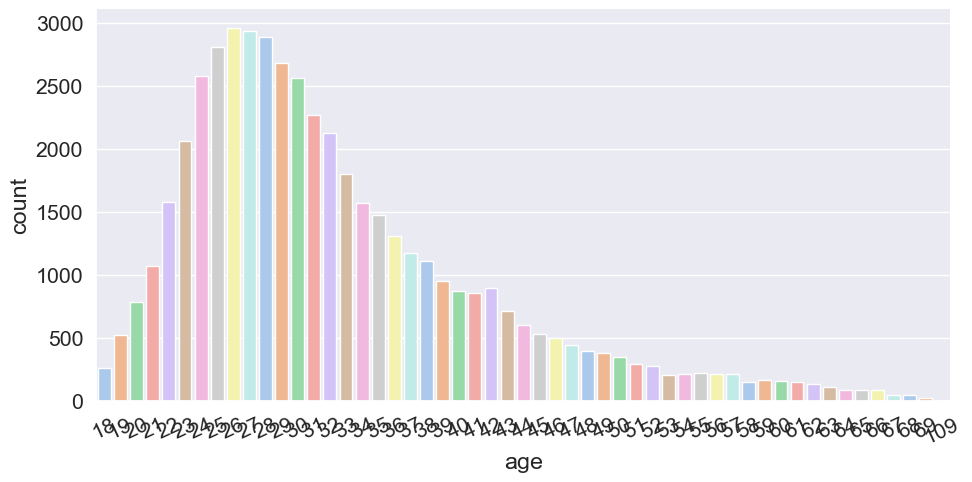

In [38]:
plt.figure(figsize=(15, 7))

sns.catplot(x = 'age', 
            data = okcupid_profiles, 
            kind = 'count', 
            palette = 'pastel', 
            height = 5, # make the plot 5 units high
            aspect = 2)

plt.xticks(rotation = 25)

plt.show()